# Introduction/Project Overview:

In this notebook, I will go over the World Health Organization Life Expectancy dataset. This dataset can be found on [kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). We are given data on a country, population, health issues, life expectancy, etc. Our goal would be to create a model that can accurately determine the life expectency given a some characteristics on a population. Throughout this notebook I will visualize the data, explain some data preprocessing techniques, construct and evaluate models and analyze the results.

### Data Exploration & Preprocessing:
I will go over the dataset, analyzing its various features, checking for missing values, and gaining insights into the distribution of variables. Prior to building the models, I will preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features to ensure good model performance.

### Model Building & Evaluation:
In this notebook I will try implement a couple of models to try and see which ones are more accurate at predicting life expectancy. This is a supervised learning task since we are given the life expectancy of these population. Additionally this is a regression tasks because we are trying to predict a numerical value rather then put something into a category. For this notebook the models I chose is multiple linear regression, polynomial regression and a neural network. Lastly I will interpret the results of each model. 


### Conclusion:
Finally, I will be discussing potential areas for model improvement, what stood out to me and what were some challanges. The conclusion serves more as a reflection for me on my time working on this notebook. This will serve as a good test for me to keep learning and testing my skills. Lets get to it!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Exploration & Preprocessing:
As mentioned earlier I got the dataset from kaggle. The link to that can be found above in the project overview. The download came with a csv file. Since I have it locally on my computer I can eassily access the data as shown below. Some of the first steps we will do before creating a model is to see what our data looks like.

In [2]:
data = pd.read_csv('./Life Expectancy Data.csv')

Lets take a look at the first couple of entries in our dataset and what columns are int it.

In [3]:
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2922 non-null   object 
 1   Year                             2922 non-null   int64  
 2   Status                           2922 non-null   object 
 3   Life expectancy                  2912 non-null   float64
 4   Adult Mortality                  2912 non-null   float64
 5   infant deaths                    2922 non-null   int64  
 6   Alcohol                          2729 non-null   float64
 7   percentage expenditure           2922 non-null   float64
 8   Hepatitis B                      2369 non-null   float64
 9   Measles                          2922 non-null   int64  
 10   BMI                             2888 non-null   float64
 11  under-five deaths                2922 non-null   int64  
 12  Polio               

So we have 22 columns in total. We have three categorical columns and 19 numeric columns. We also have quite some missing values so we will try and fill them later. The column names are pretty straight forward but if you would like to read more on them there are explanations on kaggle.

Lets see what other information we can get at a glance from our data. 

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources
count,2922.000000,2912.000000,2912.000000,2922.00000,2729.000000,2922.000000,2369.000000,2922.000000,2888.000000,2922.000000,2903.000000,2697.000000,2903.000000,2922.000000,2474.000000,2.270000e+03,2888.000000,2888.000000,2755.000000
mean,2007.518823,69.158585,165.375000,30.46475,4.614434,734.257951,80.829042,2432.080424,38.228913,42.260438,82.485704,5.929622,82.287289,1.751095,7409.578404,1.284307e+07,4.860180,4.891205,0.626125
std,4.613863,9.507065,124.377503,118.22895,4.060504,1989.000255,25.117593,11497.376328,20.013652,160.855549,23.476201,2.502567,23.727348,5.090214,14240.127119,6.121744e+07,4.423829,4.512590,0.210677
min,2000.000000,36.300000,1.000000,0.00000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000
25%,2004.000000,63.000000,74.000000,0.00000,0.860000,4.521385,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,462.494371,2.146920e+05,1.600000,1.600000,0.492000
50%,2008.000000,72.000000,144.000000,3.00000,3.790000,64.395284,92.000000,16.000000,43.200000,4.000000,93.000000,5.720000,93.000000,0.100000,1753.383635,1.420384e+06,3.400000,3.400000,0.676000
75%,2012.000000,75.600000,228.000000,22.00000,7.740000,436.496201,97.000000,362.000000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5856.794374,7.462979e+06,7.200000,7.200000,0.777000
max,2015.000000,89.000000,723.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000


From the table we can see that the minimum life expectancy is 36 while the max is 89. The max adult mortality is 723 per thousand in population, while the min is 1. The average alcohol consumption per liters per capita is a lot lower than at I expected but the min is 0.01 which makes sense as some countries might have religious restrictions. It is also very disturbing seeing the low immunization coverage for some of the diseases. Especially when the average is pretty high for some. Overall this table gives us some interesting information on the distribution of the data. 

Below I am changing the column names because they previously gave me issues the way it was originally formated. 

In [6]:
data.columns = [x.lower().strip().replace(' ', '_') for x in data.columns]

Now we are selecting the numerical and categorical columns so we can do some light data exploration.

In [7]:
numerical = data.select_dtypes(include=['float64', 'int64']).columns

In [8]:
categorical = data.select_dtypes(include=['object']).columns

Lets start by checking the differences between developed and developing countries.

In [9]:
pd.pivot_table(data, index='status', values=numerical)

,adult_mortality,alcohol,bmi,diphtheria,gdp,hepatitis_b,hiv/aids,income_composition_of_resources,infant_deaths,life_expectancy,measles,percentage_expenditure,polio,population,thinness_5-9_years,thinness__1-19_years,total_expenditure,under-five_deaths,year
status,,,,,,,,,,,,,,,,,,,
Developed,79.685547,9.826736,51.803906,93.476562,22053.386446,88.041298,0.100000,0.852489,1.494141,79.197852,499.005859,2703.600380,93.736328,6.830053e+06,1.296680,1.320703,7.554042,1.810547,2007.500000
Developing,183.655417,3.490713,35.303662,79.891259,4171.460930,79.624631,2.101867,0.580278,36.619502,67.016875,2842.758506,315.874829,80.076537,1.419227e+07,5.665783,5.622896,5.577921,50.853942,2007.522822


Above we can see that there are very big differences between the two types of countries. Developing countires have higher moratlity rates, and overall haelth issues. While the difference in immunization coverage for developed and developing countries is not a huge difference, developing countries still have less of it, which is important to note. Now lets take a look at the same data by each country.

In [10]:
pd.pivot_table(data, index='country', values=numerical)

,adult_mortality,alcohol,bmi,diphtheria,gdp,hepatitis_b,hiv/aids,income_composition_of_resources,infant_deaths,life_expectancy,measles,percentage_expenditure,polio,population,thinness_5-9_years,thinness__1-19_years,total_expenditure,under-five_deaths,year
country,,,,,,,,,,,,,,,,,,,
Afghanistan,269.0625,0.014375,15.51875,52.3125,340.015425,64.562500,0.10000,0.415375,78.2500,58.19375,2362.2500,34.960110,48.3750,9.972260e+06,15.58125,16.58125,8.252500,107.5625,2007.5
Albania,45.0625,4.848750,49.06875,98.0625,2119.726679,98.000000,0.10000,0.709875,0.6875,75.15625,53.3750,193.259091,98.1250,6.969116e+05,1.70000,1.61875,5.945625,0.9375,2007.5
Algeria,108.1875,0.406667,48.74375,91.8750,2847.853392,78.000000,0.10000,0.694875,20.3125,73.61875,1943.8750,236.185241,91.7500,2.164983e+07,5.97500,6.09375,4.604000,23.5000,2007.5
Angola,328.5625,5.740667,18.01875,47.6875,1975.143045,70.222222,2.36875,0.458375,83.7500,49.01875,3561.3125,102.100268,46.1250,1.014710e+07,6.66875,6.19375,3.919333,132.6250,2007.5
Antigua and Barbuda,127.5000,7.949333,38.42500,98.3125,9759.305728,98.266667,0.12500,0.488625,0.0000,75.05625,0.0000,1001.585226,96.9375,NaN,3.37500,3.42500,4.791333,0.0000,2007.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),163.0000,7.420000,54.48750,68.5000,NaN,66.250000,0.10000,0.726812,9.3750,73.38750,165.0000,0.000000,74.6875,NaN,1.56250,1.65000,4.998667,10.7500,2007.5
Viet Nam,126.5625,3.087333,11.18750,91.7500,NaN,87.538462,0.14375,0.627062,29.1875,74.77500,4232.9375,0.000000,94.9375,NaN,15.62500,14.92500,5.977333,36.5000,2007.5
Yemen,211.8125,0.047333,33.48750,72.6250,NaN,55.687500,0.10000,0.475500,39.3750,63.86250,2761.1875,0.000000,67.1250,NaN,13.75000,13.83125,5.005333,51.6250,2007.5


I realized that there are way too many countries to do some analysis on. I did not know that there was this many in the dataset. Regardless we can see that all these countries have distinct values. It would be interesting to see if we could possibly plot this. 

Now we are going to be ploting life expectancy against all other numerical columns to see if there is a relationship. We are using life expectancy because this is the column of interest that we are trying to predict later.

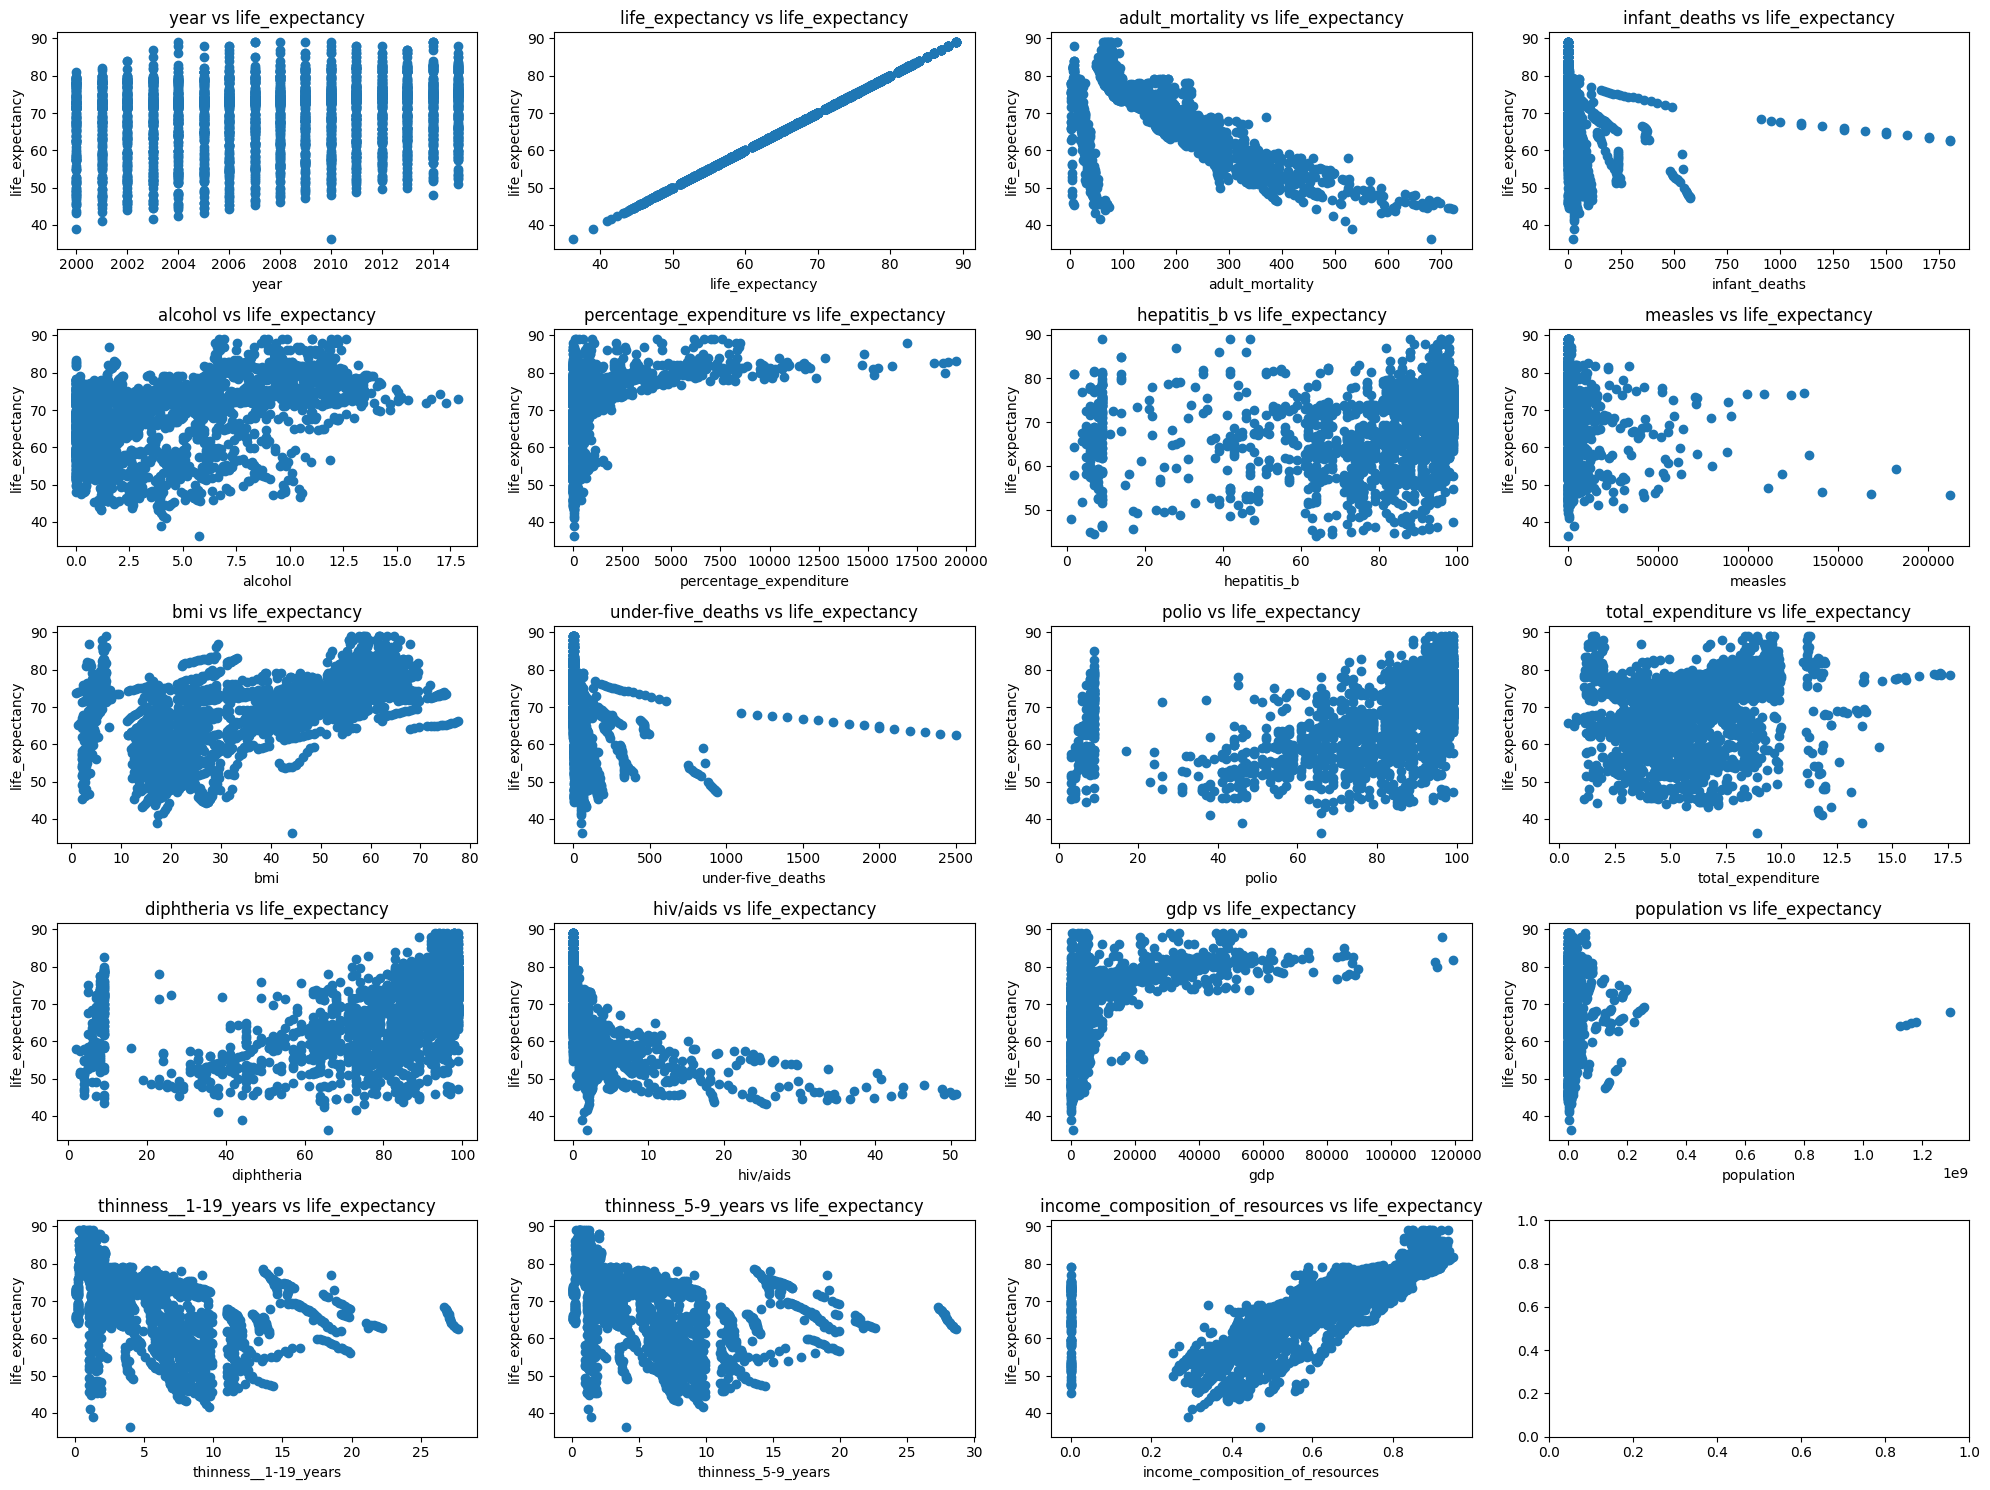

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(numerical):
    axes[i].scatter(data[col], data['life_expectancy'])  
    axes[i].set_title(f'{col} vs life_expectancy')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('life_expectancy')
plt.tight_layout()
plt.show()

From the graphs above there does not seem to be much of a relationship between life expectancy and the other columns in the dataset. By that I mean that there is no very noticable relationship.  The columns that seem to have some relationship are adult mortality (makes sense), infant deaths, percentage expenditure, under five deaths, hiv/aids, and income composition of resources. Of these adult mortality and income composition of resources seem to be the most coralated. It is also interesting to see infant deaths and under five deaths seem very similar. Same for the thiness columns.

Lastly there seems to be a group of populations that are constant in their life expectancy. For example if we look at income composition of resources we see that even at 0.0 the life expectancy changes up and down. This pattern can be seen through most graphs above. It might be some inconsistent or false reporting. 

Now we move on to graphing the distribution of the columns. 

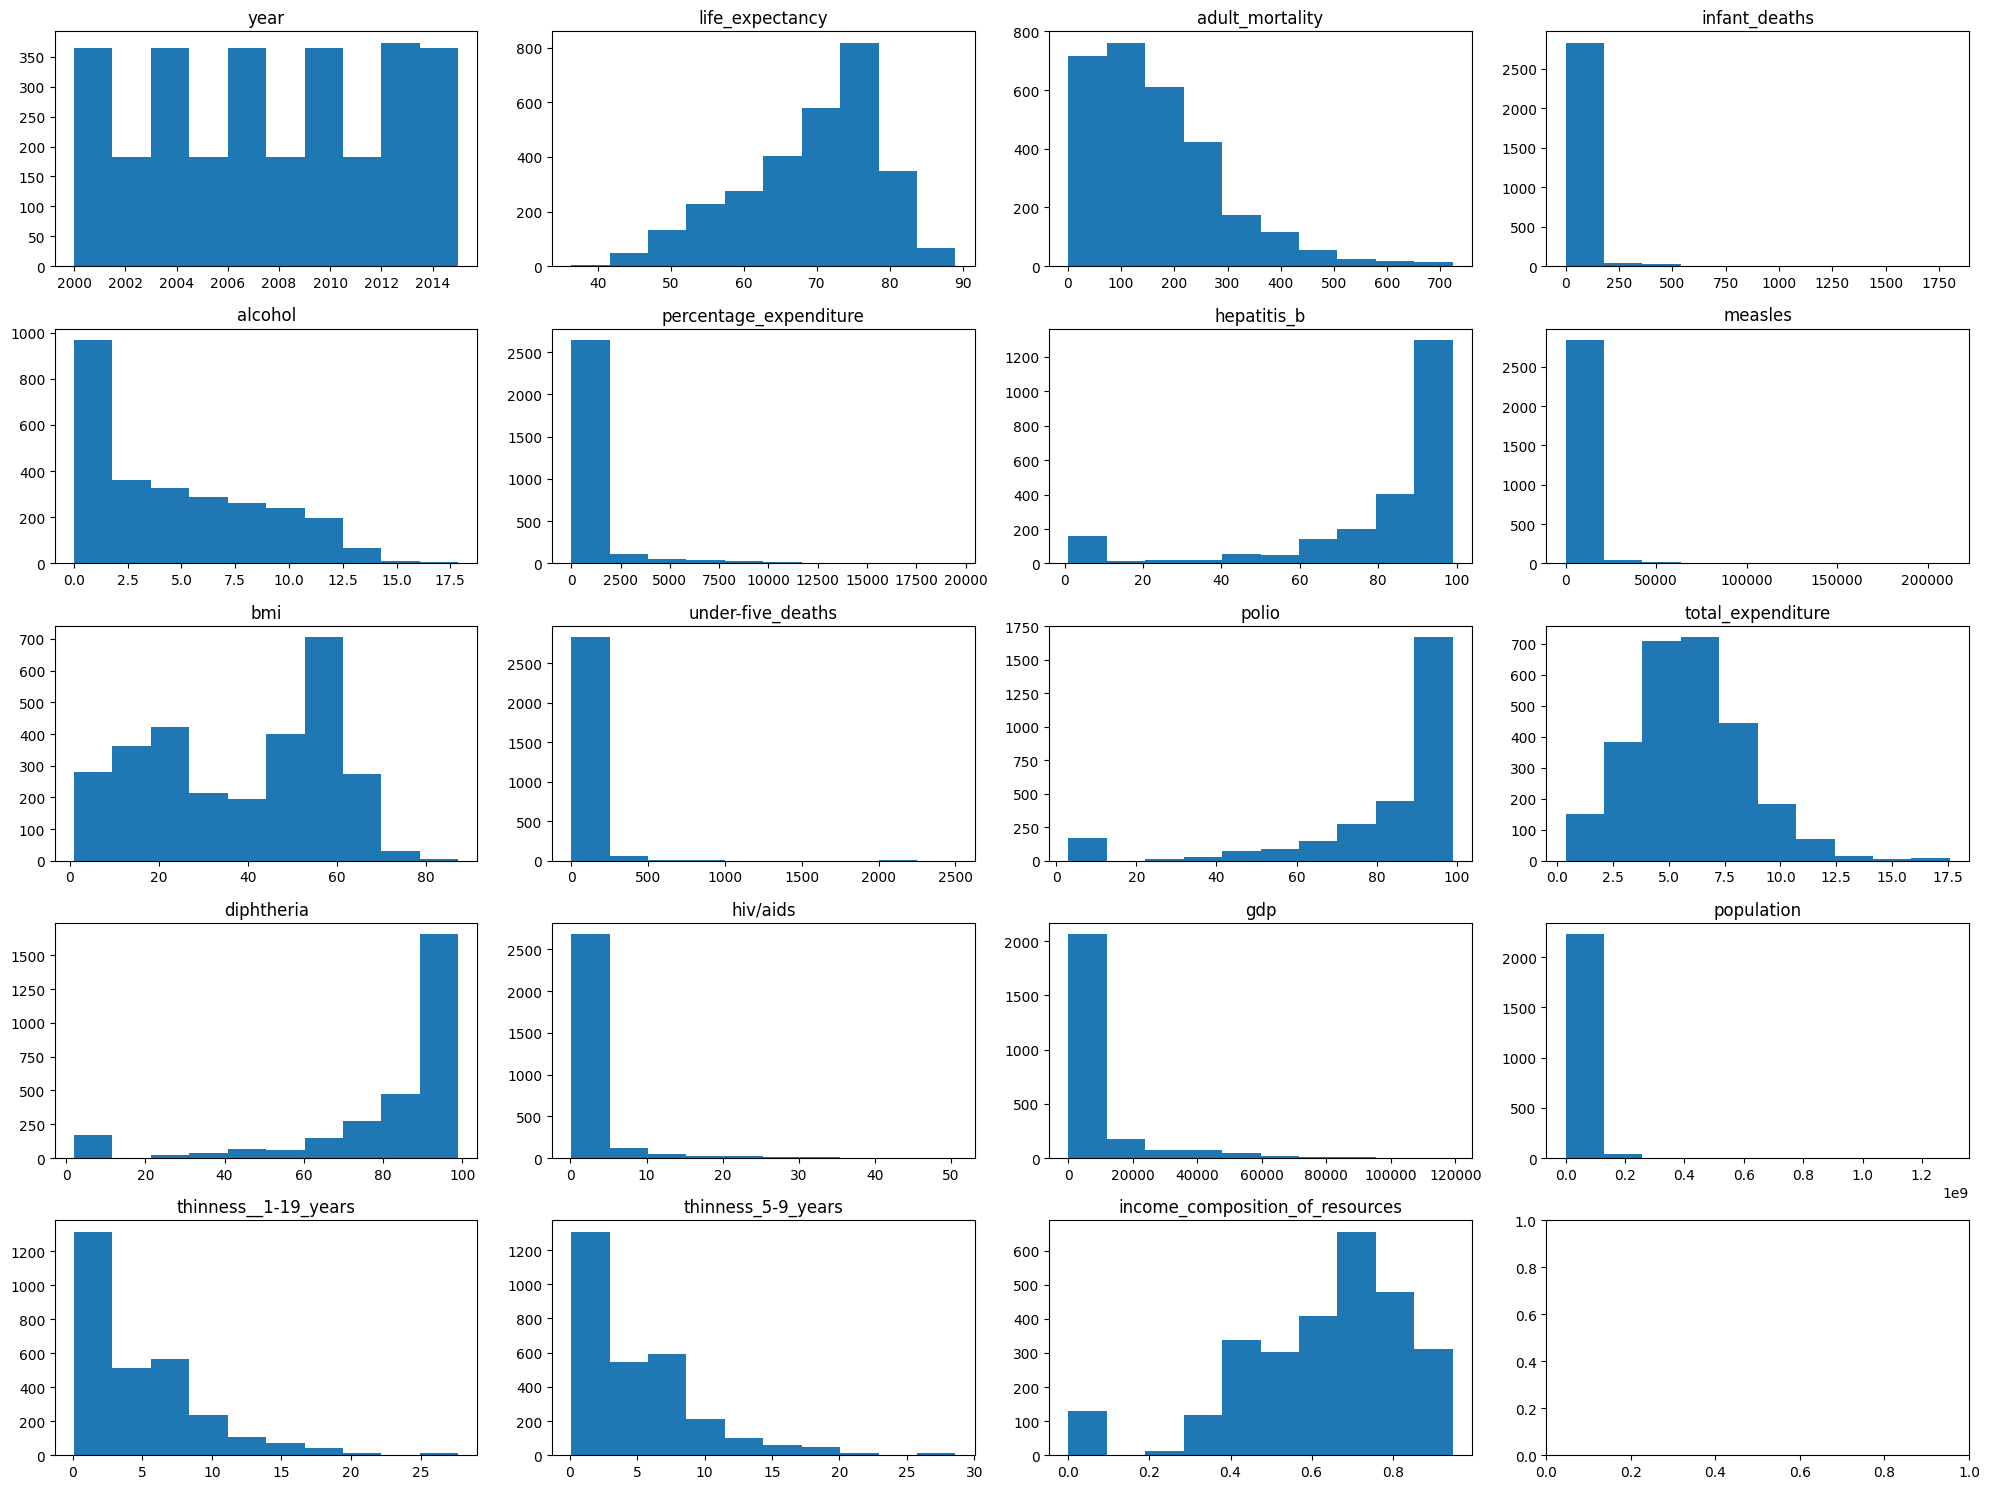

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))  
axes = axes.flatten()
for i, col in enumerate(numerical):
    axes[i].hist(data[col])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

Everything seems alright, theres no big outliers. We will normalize and scale the data later. Lets now count the number of developed and devloping countries. 

In [13]:
data['status'].value_counts() 

status
Developing    2410
Developed      512
Name: count, dtype: int64

## Filling missing Values
Now that we have taken a look at our data, checked patterns, etc lets see what we can do about the missing values. First we must count how many values we are missing and where. 

In [14]:
data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  225
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

We have a lot of missing values all through out the columns. Most missing value is population, hepatitis and gdp. We can look into some patterns of which countries have missing values and try to see why. We can then start looking into countries that are similar to fill in the values. We'll start by seperating the data that has missing values.

In [15]:
missing_data = data[data.isnull().any(axis=1)]

In [16]:
missing_data.head(5)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7


In [ ]:
missing_data.country.value_counts()

The cell above tells us which countries seem to appear in the missing dataframe more often. We can use this to see fi

In [18]:
missing_data.status.value_counts()

status
Developing    1018
Developed      270
Name: count, dtype: int64

There seems to be more developing countires with missing values whihc makes sense because they might not have the infrustructure to keep count of all the data. 

In [19]:
missing_counts = missing_data.isnull().sum(axis=1)
df_one_missing = missing_data[missing_counts == 1]

In [20]:
# missing_data[(missing_data['country'] == 'female') & (data['Pclass'] == 1) & (data['Fare'] >= 80) &

In [21]:
len(df_one_missing)

657

In [22]:
df_one_missing.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                              0
percentage_expenditure               0
hepatitis_b                        445
measles                              0
bmi                                  0
under-five_deaths                    0
polio                                0
total_expenditure                    0
diphtheria                           0
hiv/aids                             0
gdp                                  8
population                         204
thinness__1-19_years                 0
thinness_5-9_years                   0
income_composition_of_resources      0
schooling                            0
dtype: int64